## Importing Libraries 

In [999]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, TargetEncoder, StandardScaler
import joblib
from sklearn.feature_selection import f_classif
import scipy.stats as ss
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import category_encoders as ce

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.3f}'.format

# Show all columns on output
pd.set_option('display.max_columns', 999)


## Loading Data

In [1000]:
# Define the path to the Excel file
file_path = r"./Predection_Data.xlsx"

# Define the sheet name to read data from
sheet_name = 'vw_ChurnData'

# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name=sheet_name)


## Data Exploration

In [1001]:
# Display the first few rows of the fetched data
print(data.head(10))

  Customer_ID  Gender  Age Married          State  Number_of_Referrals  \
0   77079-BIH  Female   55     Yes          Bihar                    4   
1   77099-KAR  Female   19      No      Karnataka                   11   
2   77101-RAJ  Female   26      No      Rajasthan                    4   
3   77144-TAM  Female   45     Yes     Tamil Nadu                    5   
4   77147-BIH  Female   50      No          Bihar                   13   
5   77147-RAJ  Female   50      No      Rajasthan                    2   
6   77154-UTT  Female   24     Yes  Uttar Pradesh                   11   
7   77189-WES    Male   57      No    West Bengal                    4   
8   77222-UTT  Female   83      No    Uttarakhand                   11   
9   77228-ASS  Female   21      No          Assam                    6   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines Internet_Service  \
0                18     Deal 1           Yes            Yes              Yes   
1                 1     D

In [1002]:
# to show the total entires, datatype and count of each feature
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6007 non-null   object 
 1   Gender                       6007 non-null   object 
 2   Age                          6007 non-null   int64  
 3   Married                      6007 non-null   object 
 4   State                        6007 non-null   object 
 5   Number_of_Referrals          6007 non-null   int64  
 6   Tenure_in_Months             6007 non-null   int64  
 7   Value_Deal                   2710 non-null   object 
 8   Phone_Service                6007 non-null   object 
 9   Multiple_Lines               6007 non-null   object 
 10  Internet_Service             6007 non-null   object 
 11  Internet_Type                4784 non-null   object 
 12  Online_Security              6007 non-null   object 
 13  Online_Backup     

In [1003]:
#describ the numeric data (we have 9 numerical data as showen in info())
data.describe()

,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
count,6007.000,6007.000,6007.000,6007.000,6007.000,6007.000,6007.000,6007.000,6007.000
mean,47.289,7.440,17.395,65.088,2430.986,2.039,7.015,797.283,3233.246
std,16.805,4.622,10.593,31.068,2267.481,8.066,25.406,854.859,2856.181
min,18.000,0.000,1.000,-10.000,19.100,0.000,0.000,0.000,21.610
25%,33.000,3.000,8.000,35.950,539.950,0.000,0.000,107.085,833.685
50%,47.000,7.000,17.000,71.100,1556.850,0.000,0.000,470.220,2367.150
75%,60.000,11.000,27.000,90.450,4013.900,0.000,0.000,1269.840,5105.685
max,84.000,15.000,36.000,118.750,8684.800,49.790,150.000,3564.720,11979.340


In [1004]:
#Check sample of negative data in Monthly_Charge < 0

data[data["Monthly_Charge"] < 0].head(5)

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,Internet_Type,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
18,79098-TAM,Female,55,No,Tamil Nadu,9,31,Deal 4,Yes,No,No,NaN,No,No,No,No,No,No,No,No,One Year,Yes,Mailed Check,-1.000,415.900,0.000,0,602.600,1018.500,Stayed,Others,Others
84,87534-TAM,Female,49,Yes,Tamil Nadu,13,15,Deal 4,Yes,Yes,Yes,Fiber Optic,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,-7.000,1676.950,0.000,0,769.120,2446.070,Churned,Competitor,Competitor had better devices
90,87630-MAD,Male,66,Yes,Madhya Pradesh,3,34,Deal 2,Yes,Yes,No,NaN,No,No,No,No,No,No,No,No,Two Year,Yes,Credit Card,-10.000,1413.000,0.000,0,1088.720,2501.720,Stayed,Others,Others
181,99559-UTT,Male,57,Yes,Uttar Pradesh,8,15,NaN,Yes,No,No,NaN,No,No,No,No,No,No,No,No,Month-to-Month,No,Mailed Check,-8.000,19.400,0.000,0,3.140,22.540,Churned,Dissatisfaction,Service dissatisfaction
289,72873-JAM,Male,44,No,Jammu & Kashmir,2,12,Deal 4,Yes,Yes,Yes,Fiber Optic,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,-7.000,825.700,0.000,0,237.380,1063.080,Churned,Competitor,Competitor made better offer


In [1005]:
# show counts of Target Column ( data imbalnced )
data['Customer_Status'].value_counts()

Customer_Status
Stayed     4275
Churned    1732
Name: count, dtype: int64

In [1006]:
data['Contract'].value_counts()

Contract
Month-to-Month    2919
Two Year          1699
One Year          1389
Name: count, dtype: int64

In [1007]:
data['Payment_Method'].value_counts()

Payment_Method
Bank Withdrawal    3415
Credit Card        2284
Mailed Check        308
Name: count, dtype: int64

## Data Cleaning 

Handeling Negative calues in 'Monthely_Charge'

In [1008]:
# Identify the column with negative values
column_to_clean = 'Monthly_Charge'
# Replace negative values with zero
data = data.copy()
data[column_to_clean] = data[column_to_clean].clip(lower=0)
print("DataFrame after replacing negative Monthly_Charge with zero:")
print(data[[column_to_clean, 'Customer_Status']].head(10))

DataFrame after replacing negative Monthly_Charge with zero:
        Monthly_Charge Customer_Status
0               89.900          Stayed
1               56.150         Churned
2               85.950          Stayed
3               44.450          Stayed
4               93.800         Churned
5               39.500          Stayed
6               63.950          Stayed
7               24.250          Stayed
8               29.900          Stayed
9              114.300          Stayed


In [1009]:
#Check negative values again

data[data["Monthly_Charge"] < 0].head(10)

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,Internet_Type,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason


# Encoding Categorical Columns

In [1010]:
print(data.columns.tolist())

['Customer_ID', 'Gender', 'Age', 'Married', 'State', 'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup', 'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing', 'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason']


In [1011]:
## 1. Binary Encoding (for columns with only 2 categories)
binary_cols = ['Gender', 'Married', 'Phone_Service', 'Multiple_Lines', 
               'Internet_Service', 'Online_Security', 'Online_Backup',
               'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
               'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data',
               'Paperless_Billing', 'Customer_Status']

# Simple binary mapping
for col in binary_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0, 'Churned': 1, 'Stayed': 0})

In [1012]:
## 2. One-Hot Encoding (for nominal categorical columns with multiple categories)
# Using pandas get_dummies
onehot_cols = ['Internet_Type','Value_Deal']
data = pd.get_dummies(data, columns=onehot_cols, prefix=onehot_cols, drop_first=False)

In [1013]:
## 3. Ordinal Encoding (for columns with inherent order)
# For Payment_Method (assuming order exists)
Payment_mapping = {
    'Bank Withdrawal': 0,    
    'Credit Card': 1,
    'Mailed Check': 2
}

data['Payment_Method'] = data['Payment_Method'].map(Payment_mapping)

# For Contract (alternative to one-hot if order matters)
contract_mapping = {
        'Month-to-Month': 0,
        'One Year': 1,
        'Two Year': 2
    }
data['Contract'] = data['Contract'].map(contract_mapping)



In [1014]:
## 4. Frequency Encoding (for high-cardinality columns)
# Calculate frequencies
state_freq = data['State'].value_counts(normalize=True)
# Map frequencies to original values
data['State'] = data['State'].map(state_freq)

In [1015]:
## Dropping columns with single value or unique identifiers
cols_to_drop = ['Customer_ID', 'Churn_Category', 'Churn_Reason']
data = data.drop(cols_to_drop, axis=1, errors='ignore')

In [1016]:
data['Payment_Method'].value_counts()

Payment_Method
0    3415
1    2284
2     308
Name: count, dtype: int64

In [1017]:
# Display the transformed dataframe
print(data.head())
print("\nData types after encoding:")
print(data.dtypes)

   Gender  Age  Married                State  Number_of_Referrals  \
0       0   55        1                0.051                    4   
1       0   19        0                0.073                   11   
2       0   26        0                0.041                    4   
3       0   45        1                0.093                    5   
4       0   50        0                0.051                   13   

   Tenure_in_Months  Phone_Service  Multiple_Lines  Internet_Service  \
0                18              1               1                 1   
1                 1              1               0                 1   
2                33              1               0                 1   
3                12              0               0                 1   
4                32              1               0                 1   

   Online_Security  Online_Backup  Device_Protection_Plan  Premium_Support  \
0                1              1                       1                1

In [1018]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       6007 non-null   int64  
 1   Age                          6007 non-null   int64  
 2   Married                      6007 non-null   int64  
 3   State                        6007 non-null   float64
 4   Number_of_Referrals          6007 non-null   int64  
 5   Tenure_in_Months             6007 non-null   int64  
 6   Phone_Service                6007 non-null   int64  
 7   Multiple_Lines               6007 non-null   int64  
 8   Internet_Service             6007 non-null   int64  
 9   Online_Security              6007 non-null   int64  
 10  Online_Backup                6007 non-null   int64  
 11  Device_Protection_Plan       6007 non-null   int64  
 12  Premium_Support              6007 non-null   int64  
 13  Streaming_TV      

## Feature Engineering

🧠 Step 1: Compute Feature Importanc

In [1019]:
X_COLUMNS = data.columns.drop('Customer_Status')
Y_COLUMN = 'Customer_Status'

In [1020]:
X = data.drop(columns=[Y_COLUMN])
y = data[Y_COLUMN]

# Fit the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importance scores
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

# Print feature importance
print("\n🎯 Feature Importance:\n", importance_df)

# Filter features with importance < 0.005
low_importance_features = importance_df[importance_df['Importance'] < 0.005]['Feature'].tolist()

# Print the features with importance < 0.005
print("\n📉 Features with importance < 0.005:\n", low_importance_features)


🎯 Feature Importance:
                                                  Feature           Importance
Contract                                        Contract                0.138
Total_Revenue                              Total_Revenue                0.134
Total_Charges                              Total_Charges                0.118
Monthly_Charge                            Monthly_Charge                0.082
Total_Long_Distance_Charges  Total_Long_Distance_Charges                0.079
Age                                                  Age                0.067
Tenure_in_Months                        Tenure_in_Months                0.046
State                                              State                0.041
Number_of_Referrals                  Number_of_Referrals                0.037
Internet_Type_Fiber Optic      Internet_Type_Fiber Optic                0.027
Payment_Method                            Payment_Method                0.019
Online_Security                         

Visualize Feature Importance

In [1021]:
corr_matrix = data[X_COLUMNS].corr()
high_pairs = [(i, j, corr_matrix.loc[i, j])
              for i in corr_matrix.columns
              for j in corr_matrix.columns
              if i != j and abs(corr_matrix.loc[i, j]) > 0.9]

print("\n📊 Highly Correlated Pairs:\n", high_pairs)


📊 Highly Correlated Pairs:
 [('Total_Charges', 'Total_Revenue', 0.9701300368034772), ('Total_Revenue', 'Total_Charges', 0.9701300368034772)]


📊 Step 2 : Visualize Feature Importance 

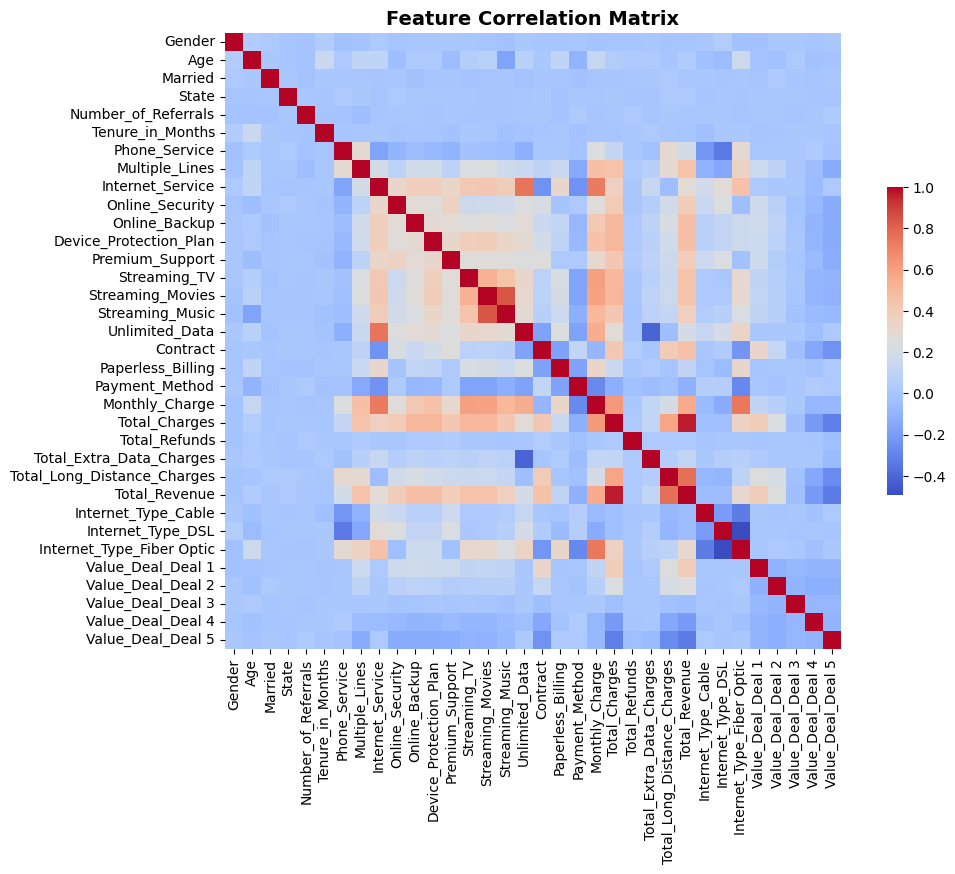

In [1022]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True, cbar_kws={"shrink": .5})
plt.title("Feature Correlation Matrix", fontsize=14, fontweight="bold")
plt.show()

C:\Users\walid\AppData\Local\Temp\ipykernel_17940\3488382165.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


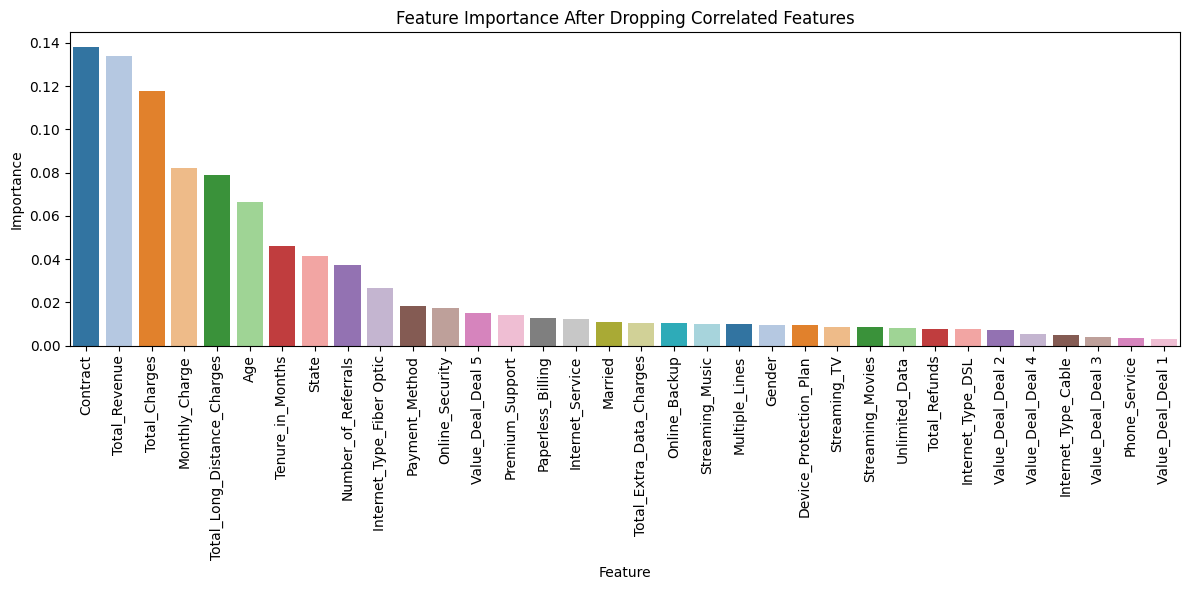

In [1023]:
plt.figure(figsize=(max(12, len(importance_df) * 0.25), 6))
sns.barplot(
    data=importance_df.sort_values(by='Importance', ascending=False),
    x='Feature', y='Importance', palette='tab20'
)
plt.title("Feature Importance After Dropping Correlated Features")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Model

Split traget variales

In [1024]:
print(data.columns.tolist())

['Gender', 'Age', 'Married', 'State', 'Number_of_Referrals', 'Tenure_in_Months', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Online_Security', 'Online_Backup', 'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing', 'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status', 'Internet_Type_Cable', 'Internet_Type_DSL', 'Internet_Type_Fiber Optic', 'Value_Deal_Deal 1', 'Value_Deal_Deal 2', 'Value_Deal_Deal 3', 'Value_Deal_Deal 4', 'Value_Deal_Deal 5']


In [1025]:
# Split data into features and target
data = data.drop(columns=['Streaming_TV', 'Streaming_Movies', 'Streaming_Music','Value_Deal_Deal 1','Value_Deal_Deal 2','Value_Deal_Deal 3','Value_Deal_Deal 4'])
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']


Apply SMOTE for data

In [1026]:

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [1027]:
y_train.value_counts()

Customer_Status
1    3423
0    3417
Name: count, dtype: int64

Training the model

In [1028]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=400,
                                  max_depth= None,
                                  oob_score=True,
                                  min_samples_split=3,
                                  max_features='sqrt',
                                  random_state=42,
                                  n_jobs=-1)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=3, n_estimators=400, n_jobs=-1,
                       oob_score=True, random_state=42)

In [1029]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("\n🎯 Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




🎯 Test Accuracy: 0.8900584795321638

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       858
           1       0.89      0.89      0.89       852

    accuracy                           0.89      1710
   macro avg       0.89      0.89      0.89      1710
weighted avg       0.89      0.89      0.89      1710



Visualize Performance

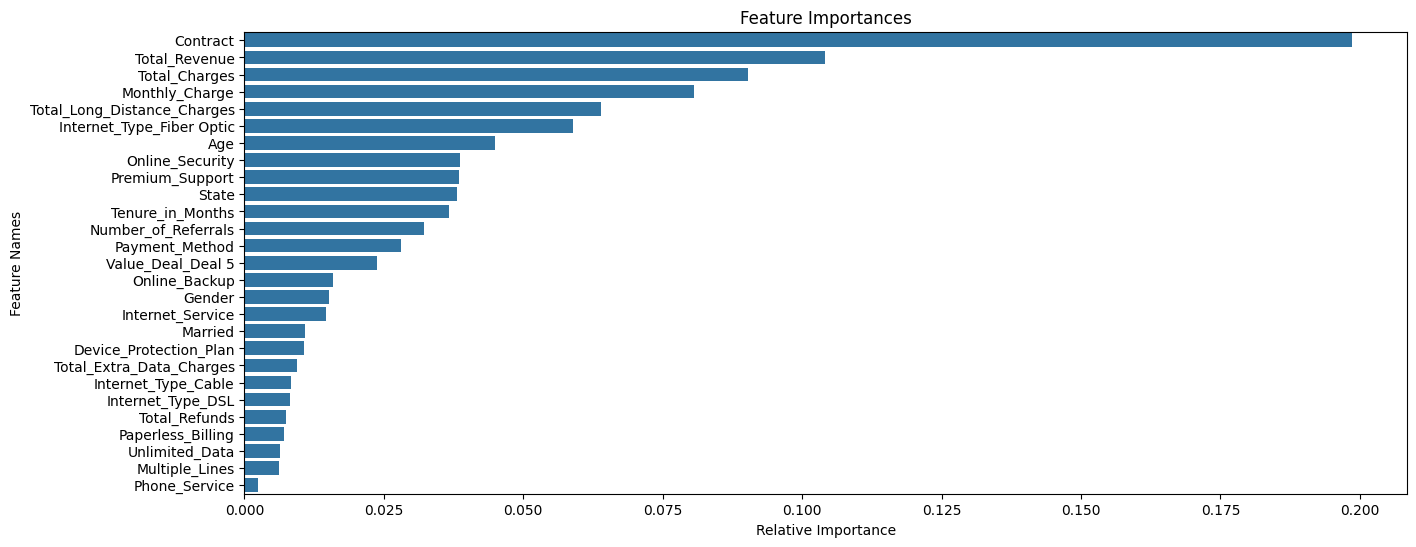

In [1030]:
# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()


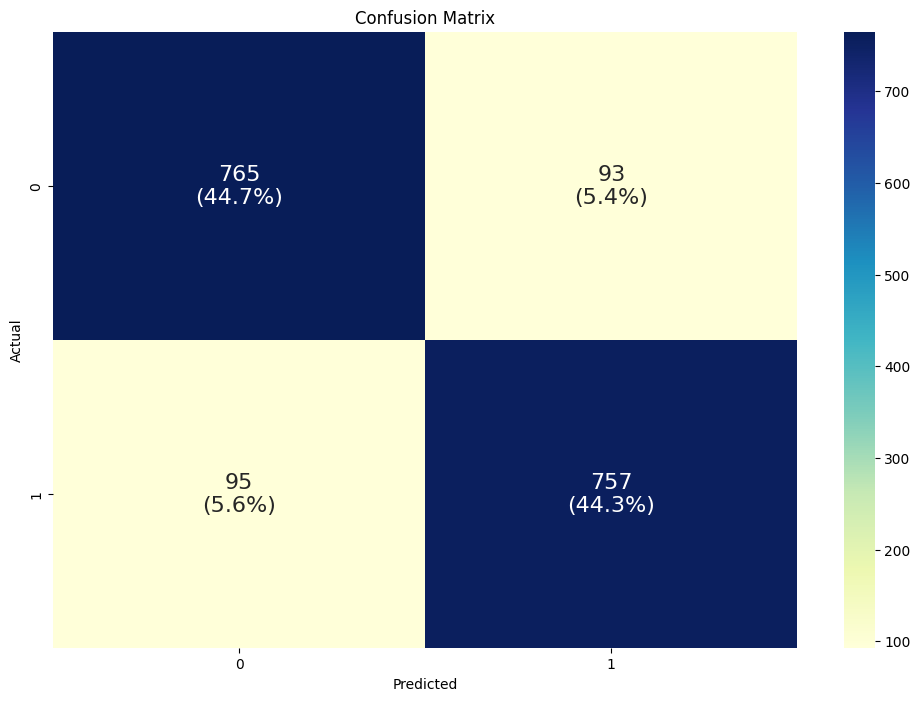

In [ ]:
encoder = LabelEncoder()
data['Customer_Status'] = encoder.fit_transform(data['Customer_Status'])
labels = encoder.inverse_transform(np.unique(y))
# plot_confusion(y_test, y_pred, labels):
cm = confusion_matrix(y_test, y_pred)
total = np.sum(cm)
box_labels = np.asarray([
    f"{val}\n({val/total:.1%})" for val in cm.flatten()
]).reshape(len(labels), len(labels))

plt.figure(figsize=(12, 8))
ax = sns.heatmap(cm, annot=box_labels, fmt='', cmap='YlGnBu',
                xticklabels=labels, yticklabels=labels, annot_kws={"fontsize": 16})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [1032]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Define the sheet name to read data from
sheet_name = 'vw_JoinData'

# Read the data from the specified sheet into a pandas DataFrame
Unseen_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(Unseen_data.head())

# Retain the original DataFrame to preserve unencoded columns
original_data = Unseen_data.copy()

# Retain the Customer_ID column
customer_ids = Unseen_data['Customer_ID']

# Drop columns that won't be used for prediction
Unseen_data = Unseen_data.drop(['Customer_ID', 'Customer_Status',
                                'Churn_Category', 'Churn_Reason',
                                'Streaming_TV', 'Streaming_Movies',
                                'Streaming_Music'], axis=1)

bin_cols = ['Gender', 'Married', 'Phone_Service', 'Multiple_Lines', 
               'Internet_Service', 'Online_Security', 'Online_Backup',
               'Device_Protection_Plan', 'Premium_Support',
               'Unlimited_Data','Paperless_Billing']

# Simple binary mapping
for col in bin_cols:
    Unseen_data[col] = Unseen_data[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

## 2. One-Hot Encoding (for nominal categorical columns with multiple categories)
# Using pandas get_dummies
onehot_col = ['Internet_Type','Value_Deal']
Unseen_data = pd.get_dummies(Unseen_data, columns=onehot_col, prefix=onehot_col, drop_first=False)

## 3. Ordinal Encoding (for columns with inherent order)
# For Payment_Method (assuming order exists)
Pay_mapping = {
    'Bank Withdrawal': 0,    
    'Credit Card': 1,
    'Mailed Check': 2
}

Unseen_data['Payment_Method'] = Unseen_data['Payment_Method'].map(Pay_mapping)

# For Contract (alternative to one-hot if order matters)
cont_mapping = {
        'Month-to-Month': 0,
        'One Year': 1,
        'Two Year': 2
    }
Unseen_data['Contract'] = Unseen_data['Contract'].map(cont_mapping)

## 4. Frequency Encoding (for high-cardinality columns)
# Calculate frequencies
st_freq = Unseen_data['State'].value_counts(normalize=True)
# Map frequencies to original values
Unseen_data['State'] = Unseen_data['State'].map(st_freq)

# Make predictions
new_predictions = rf_model.predict(Unseen_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
churned_only = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the results
churned_only.to_csv(r"./New_Predictions.csv", index=False)

  Customer_ID  Gender  Age Married            State  Number_of_Referrals  \
0   77137-MAH    Male   52      No      Maharashtra                    1   
1   77230-RAJ  Female   59     Yes        Rajasthan                    5   
2   79168-UTT  Female   78      No    Uttar Pradesh                    2   
3   82010-WES  Female   46      No      West Bengal                   14   
4   82118-JAM  Female   69     Yes  Jammu & Kashmir                    3   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines Internet_Service  \
0                 8     Deal 5           Yes             No              Yes   
1                 4        NaN           Yes             No               No   
2                10     Deal 5           Yes             No              Yes   
3                 7     Deal 5           Yes            Yes              Yes   
4                 6     Deal 5            No             No              Yes   

  Internet_Type Online_Security Online_Backup Device_Protectio